In [3]:
'''Tutorial'''
#1. Illumina 
#2. Illumina HiSeq 2000
#3. Paired-end (Library layout)
#4. Library source genomic --> DNA
#5. .fastq(=it's a read file).gz(=compressed)
#6. The files are different because they come from 
# the ends of the same fragments 


#8. While clicking on the files we can clearly 
#   see that they are 388Mb each. In the other hands, 
#   the sub's one are less bigger: 22Mb.


'Tutorial'

In [4]:
#zless file-name 

In [5]:
from Bio import SeqIO
import gzip
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import os
os.getcwd()

'/Users/yannkeita/Documents/Documents - Yann’s MacBook Pro/Bioinformatics/Bioinformatics-S2'

In [7]:
file1 = "/Users/yannkeita/Documents/Documents - Yann’s MacBook Pro/Bioinformatics/Bioinformatics-S2/SRR800768_1_sub.fastq"
file2 = "/Users/yannkeita/Documents/Documents - Yann’s MacBook Pro/Bioinformatics/Bioinformatics-S2/SRR800768_2_sub.fastq"

if os.path.exists(file1):
    print(f"File1 exists: {file1}")
else:
    print("File1 does not exist.")

with open(file1, 'r') as f:
    first_line = f.readline()
    print("First line of the file:", first_line)

with open(file2, 'r') as f:
    first_line = f.readline()
    print("First line of the second file:", first_line)


File1 exists: /Users/yannkeita/Documents/Documents - Yann’s MacBook Pro/Bioinformatics/Bioinformatics-S2/SRR800768_1_sub.fastq
First line of the file: @SRR800768.2151832 2151832/1

First line of the second file: @SRR800768.2151832 2151832/2



In [8]:
records1 = SeqIO.parse('SRR800768_1_sub.fastq', 'fastq')
records2 = SeqIO.parse('SRR800768_2_sub.fastq', 'fastq')

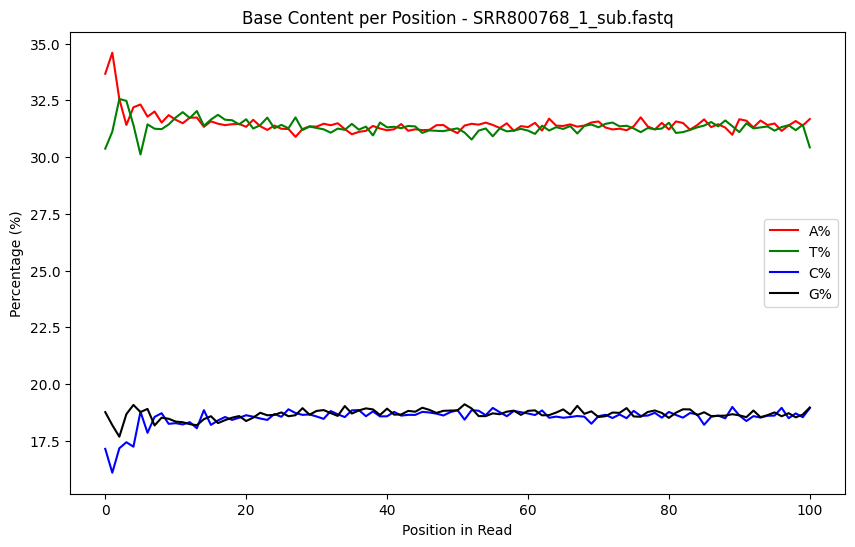

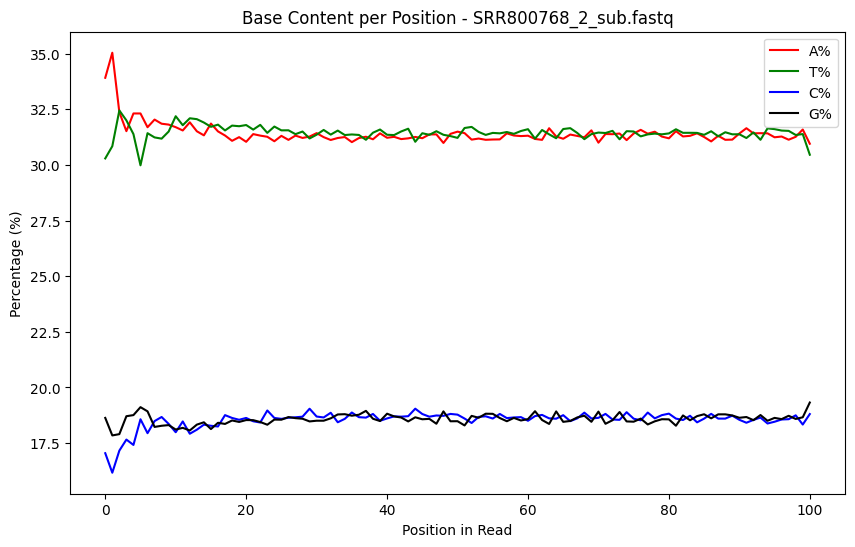

In [9]:
#1 Count the number of reads in each file
def count_reads(file):
    return sum(1 for _ in SeqIO.parse(file, "fastq"))

#2 Get the read length (assuming all reads have the same length)
def get_read_length(file):
    record = next(SeqIO.parse(file, "fastq"))
    return len(record.seq)

#3 Plot the base content per position
#3.a. base content dictionary
def base_content(file, read_length):
    base_counts = {'A': [0] * read_length, 'T': [0] * read_length, 'C': [0] * read_length, 'G': [0] * read_length}
    total_reads = 0

    records = list(SeqIO.parse(file, "fastq"))

    for record in records:
        total_reads += 1
        for i, base in enumerate(record.seq[:read_length]):  # Avoid exceeding expected read length
            if base in base_counts:
                base_counts[base][i] += 1

    return base_counts, total_reads

def plot_base_content(file, read_length):
    base_counts, total_reads = base_content(file, read_length)
    if total_reads == 0:
        print(f"Error: No reads found in {file}")
        return
    
    #total_reads = sum(base_counts['A']) / read_length  
    #percentages = {base: [count / total_reads * 100 for count in base_counts[base]] for base in base_counts}
    percentages = {base: [(count / total_reads) * 100 if total_reads > 0 else 0 for count in base_counts[base]] for base in base_counts}

    #3.b. Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(percentages['A'], label='A%', color='red')
    plt.plot(percentages['T'], label='T%', color='green')
    plt.plot(percentages['C'], label='C%', color='blue')
    plt.plot(percentages['G'], label='G%', color='black')
    plt.xlabel('Position in Read')
    plt.ylabel('Percentage (%)')
    plt.title(f'Base Content per Position - {os.path.basename(file)}')
    plt.legend()
    plt.show()
    

#3.c. Count reads and get read length
read_count_file1 = count_reads(file1)
read_count_file2 = count_reads(file2)
read_length1 = get_read_length(file1)
read_length2 = get_read_length(file2)

#3.d. Plot base content for both files
plot_base_content(file1, read_length1)
plot_base_content(file2, read_length2)



In [10]:
#4 Observations from the Plot:
'''High percentage of A and T at the beginning of the reads:
At the first few positions (0-10), there is a spike in the percentages 
of A and T bases. These peaks gradually stabilize after 
the initial positions.
Balanced AT and GC content in the middle and later positions:
Beyond the initial positions, the percentage of A, T, C, and G tends 
to stabilize around a certain range.
A and T seem to dominate slightly over G and C.
Base composition noise:
There are some fluctuations across the positions, indicating variations 
in sequencing quality or specific biases in sequencing.
Expected or Unexpected Result:
This result can be both expected and partially unexpected depending on context:
Expected Result:
In Illumina sequencing, it is common to observe biases at the start of reads. 
This can be due to:
Adapter or primer sequences affecting the initial base content.
Sequencing chemistry artifacts leading to higher initial errors.
The machine's calibration during the early cycles of sequencing.
Unexpected in a Random Genomic Sample:
If the sample were randomly distributed genomic DNA, we'd expect a relatively even 
distribution of A, T, C, and G across all positions.
Any consistently higher percentage of A/T over G/C may suggest either a sequencing 
artifact or that the sequenced genome or region naturally has an AT-rich composition.
Justification:
Since this is from a Saccharomyces cerevisiae (yeast) genome, the observed AT dominance 
may reflect genomic characteristics. Yeast genomes can have regions with higher AT content, 
especially in non-coding regions. However, the sequencing method's technical bias should 
not be ignored.'''

"High percentage of A and T at the beginning of the reads:\nAt the first few positions (0-10), there is a spike in the percentages \nof A and T bases. These peaks gradually stabilize after \nthe initial positions.\nBalanced AT and GC content in the middle and later positions:\nBeyond the initial positions, the percentage of A, T, C, and G tends \nto stabilize around a certain range.\nA and T seem to dominate slightly over G and C.\nBase composition noise:\nThere are some fluctuations across the positions, indicating variations \nin sequencing quality or specific biases in sequencing.\nExpected or Unexpected Result:\nThis result can be both expected and partially unexpected depending on context:\nExpected Result:\nIn Illumina sequencing, it is common to observe biases at the start of reads. \nThis can be due to:\nAdapter or primer sequences affecting the initial base content.\nSequencing chemistry artifacts leading to higher initial errors.\nThe machine's calibration during the early cy

In [11]:
#5 GC content : 
def compute_gc_content(file, read_length):
    base_counts, total_reads = base_content(file, read_length)

    total_G = sum(base_counts['G'])
    total_C = sum(base_counts['C'])
    total_A = sum(base_counts['A'])
    total_T = sum(base_counts['T'])
    
    total_bases = total_A + total_T + total_G + total_C  

    gc_content = ((total_G + total_C) / total_bases) * 100 if total_bases > 0 else 0

    print(f"GC Content of {os.path.basename(file)}: {gc_content:.2f}%")

    return gc_content

gc_content_file1 = compute_gc_content(file1, read_length1)
gc_content_file2 = compute_gc_content(file2, read_length2)

print(f"Known GC content of Saccharomyces cerevisiae: ~38-40%")
print(f"Difference for {os.path.basename(file1)}: {abs(gc_content_file1 - 39):.2f}%")
print(f"Difference for {os.path.basename(file2)}: {abs(gc_content_file2 - 39):.2f}%")


GC Content of SRR800768_1_sub.fastq: 37.20%
GC Content of SRR800768_2_sub.fastq: 37.12%
Known GC content of Saccharomyces cerevisiae: ~38-40%
Difference for SRR800768_1_sub.fastq: 1.80%
Difference for SRR800768_2_sub.fastq: 1.88%


In [12]:
'''The results obtain for the GC content for both files seems
to be in correlation with the ones known for saccharomyces 
cerevisiae.'''

'The results obtain for the GC content for both files seems\nto be in correlation with the ones known for saccharomyces \ncerevisiae.'

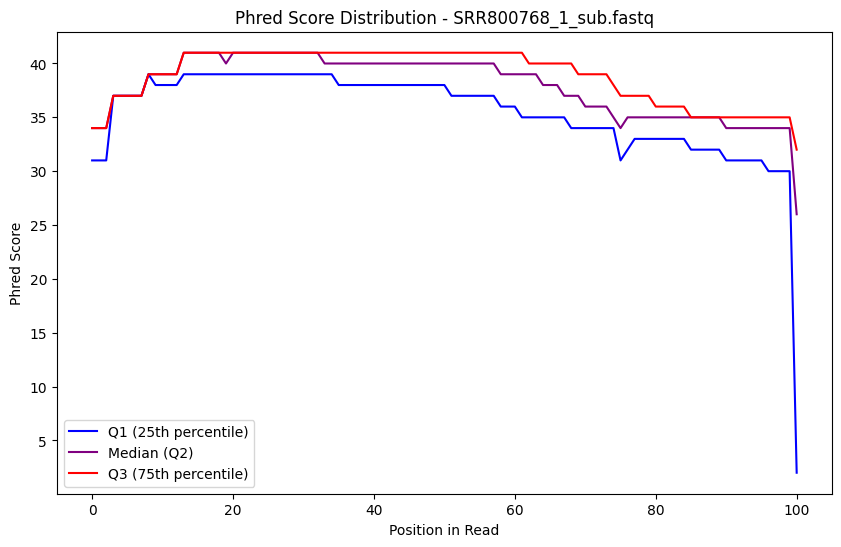

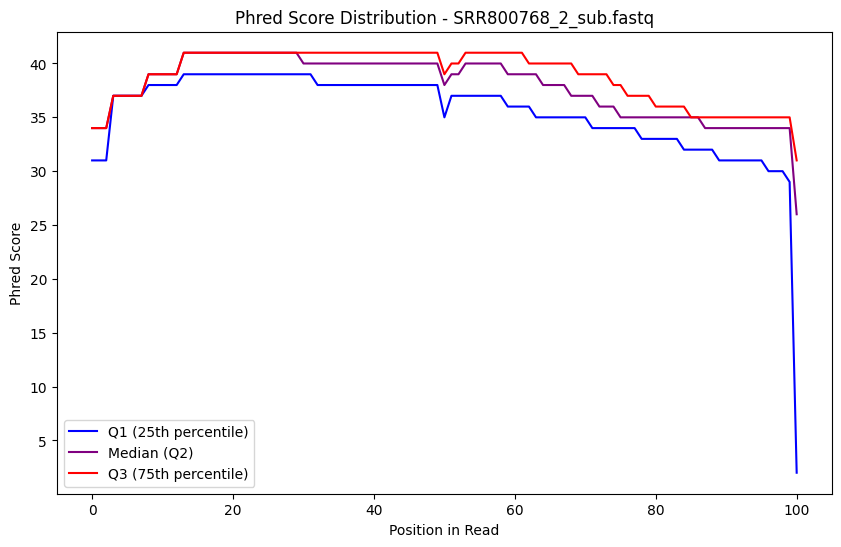

In [13]:
#6 Q1, Q2, Q3 :
def compute_phred_statistics(file, read_length):
        
    phred_scores = [[] for _ in range(read_length)]

    records = list(SeqIO.parse(file, "fastq"))

    for record in records:
        for i, score in enumerate(record.letter_annotations["phred_quality"][:read_length]):
            phred_scores[i].append(score)
    '''print("\n*** Phred Scores Per Position ***")
    for i, scores in enumerate(phred_scores):
        print(f"Position {i}: {scores}")'''

    Q1 = [np.percentile(scores, 25) if scores else 0 for scores in phred_scores]
    Q2 = [np.median(scores) if scores else 0 for scores in phred_scores]  # Median
    Q3 = [np.percentile(scores, 75) if scores else 0 for scores in phred_scores]

    return Q1, Q2, Q3

def plot_phred_scores(file, read_length):
    """ Plots Q1, Q2 (Median), and Q3 for Phred scores at each position. """
    
    Q1, Q2, Q3 = compute_phred_statistics(file, read_length)

    x = range(read_length)

    plt.figure(figsize=(10, 6))
    plt.plot(x, Q1, label="Q1 (25th percentile)", color="blue")
    plt.plot(x, Q2, label="Median (Q2)", color="purple")
    plt.plot(x, Q3, label="Q3 (75th percentile)", color="red")
    plt.xlabel("Position in Read")
    plt.ylabel("Phred Score")
    plt.title(f"Phred Score Distribution - {os.path.basename(file)}")
    plt.legend()
    plt.show()

# Plot Phred score distribution for both files
plot_phred_scores(file1, read_length1)
plot_phred_scores(file2, read_length2)


In [14]:
#7 Observation from question 6 :
'''The Phred score distribution plots indicate that base quality is not homogeneous across the reads. 
Initially, the Q1, median (Q2), and Q3 values are high (~35-40), showing that the sequencer assigns high 
confidence to the bases in the first 10-20 positions. However, a gradual decline in quality occurs after 
position 60-80, with an increasing spread between Q1 and Q3, suggesting more variability in sequencing 
accuracy. A sharp drop at the end (~position 100) highlights that 3' end bases are noisier and less reliable. 
This decline in sequencing quality is common in Next-Generation Sequencing (NGS) and can be attributed to 
several factors. Signal decay and dye degradation lead to weaker fluorescence over time, reducing base-calling 
accuracy. Phasing and pre-phasing effects cause some DNA strands to fall out of sync during sequencing, 
increasing errors at later cycles. Additionally, accumulation of base-calling errors and PCR amplification bias 
can amplify sequencing noise, further lowering confidence in bases at later positions. To mitigate these issues, 
quality control measures can be applied, including trimming low-quality ends (removing bases with Phred scores <20-25), 
filtering out low-quality reads (removing reads with an average Phred score <30), and applying error correction 
methods like SPAdes or BFC. These steps help improve downstream analyses by ensuring that only high-confidence 
sequences are retained. If needed, an algorithm for trimming low-quality bases and filtering poor-quality reads 
can be implemented to enhance data quality.'''

"The Phred score distribution plots indicate that base quality is not homogeneous across the reads. \nInitially, the Q1, median (Q2), and Q3 values are high (~35-40), showing that the sequencer assigns high \nconfidence to the bases in the first 10-20 positions. However, a gradual decline in quality occurs after \nposition 60-80, with an increasing spread between Q1 and Q3, suggesting more variability in sequencing \naccuracy. A sharp drop at the end (~position 100) highlights that 3' end bases are noisier and less reliable. \nThis decline in sequencing quality is common in Next-Generation Sequencing (NGS) and can be attributed to \nseveral factors. Signal decay and dye degradation lead to weaker fluorescence over time, reducing base-calling \naccuracy. Phasing and pre-phasing effects cause some DNA strands to fall out of sync during sequencing, \nincreasing errors at later cycles. Additionally, accumulation of base-calling errors and PCR amplification bias \ncan amplify sequencing noi

In [15]:
#8: algorithm for trimming low-quality bases and filtering poor-quality reads.

def trim_low_quality_bases(record, quality_threshold=20):
    """ Trims low-quality bases (Phred score < threshold) from both ends of a read. """
    phred_scores = record.letter_annotations["phred_quality"]

    # Trim leading low-quality bases
    start = 0
    while start < len(phred_scores) and phred_scores[start] < quality_threshold:
        start += 1

    # Trim trailing low-quality bases
    end = len(phred_scores) - 1
    while end > start and phred_scores[end] < quality_threshold:
        end -= 1

    # Return trimmed record
    return record[start:end+1]

def clean_paired_reads(file1, file2, output_paired1, output_paired2, output_single1, output_single2, quality_threshold=20, min_length=30):
    """ Cleans paired-end reads by trimming low-quality bases and filtering short reads. """
    
    paired1, paired2 = [], []  
    single1, single2 = [], []  

    records1 = list(SeqIO.parse(file1, "fastq"))
    records2 = list(SeqIO.parse(file2, "fastq"))

    for rec1, rec2 in zip(records1, records2):
        trimmed_rec1 = trim_low_quality_bases(rec1, quality_threshold)
        trimmed_rec2 = trim_low_quality_bases(rec2, quality_threshold)

        len1, len2 = len(trimmed_rec1.seq), len(trimmed_rec2.seq)

        # Keep paired reads if both pass length threshold
        if len1 >= min_length and len2 >= min_length:
            paired1.append(trimmed_rec1)
            paired2.append(trimmed_rec2)
        elif len1 >= min_length:  
            single1.append(trimmed_rec1)
        elif len2 >= min_length:  
            single2.append(trimmed_rec2)

    # Save output files
    with open(output_paired1, 'w') as f1, open(output_paired2, 'w') as f2:
        SeqIO.write(paired1, f1, "fastq")
        SeqIO.write(paired2, f2, "fastq")

    with open(output_single1, 'w') as f1, open(output_single2, 'w') as f2:
        SeqIO.write(single1, f1, "fastq")
        SeqIO.write(single2, f2, "fastq")

    print(f"Processed {file1} & {file2}:")
    print(f"  {len(paired1)} paired reads saved to {output_paired1} & {output_paired2}")
    print(f"  {len(single1)} single reads saved to {output_single1}")
    print(f"  {len(single2)} single reads saved to {output_single2}")

file1 = "SRR800768_1_sub.fastq"
file2 = "SRR800768_2_sub.fastq"

output_paired1 = "SRR800768_1_sub_clean.fastq"
output_paired2 = "SRR800768_2_sub_clean.fastq"
output_single1 = "SRR800768_1_sub_sing_clean.fastq"
output_single2 = "SRR800768_2_sub_sing_clean.fastq"

# Run the cleaning process
clean_paired_reads(file1, file2, output_paired1, output_paired2, output_single1, output_single2)

 

Processed SRR800768_1_sub.fastq & SRR800768_2_sub.fastq:
  97842 paired reads saved to SRR800768_1_sub_clean.fastq & SRR800768_2_sub_clean.fastq
  667 single reads saved to SRR800768_1_sub_sing_clean.fastq
  1285 single reads saved to SRR800768_2_sub_sing_clean.fastq


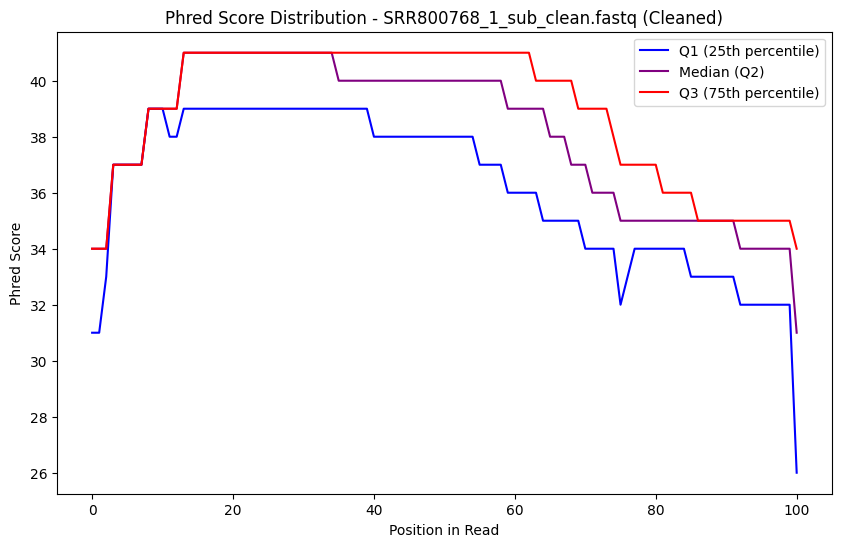

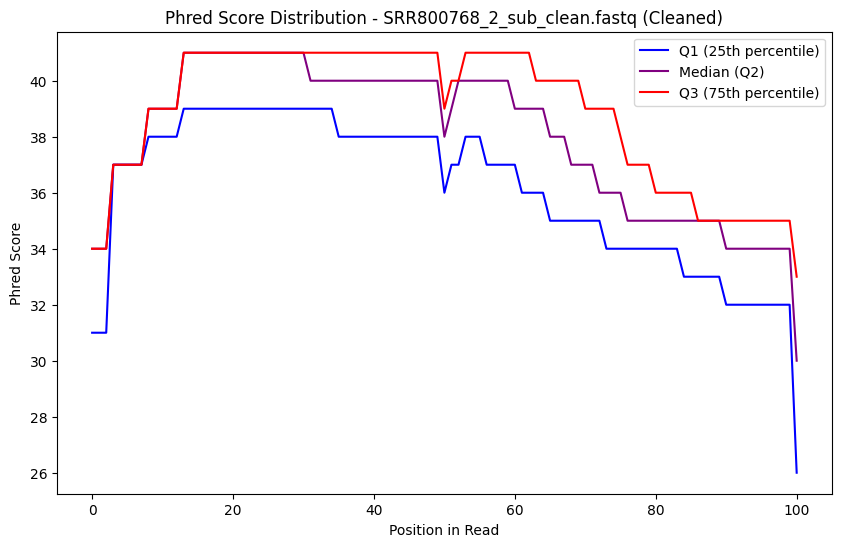

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from Bio import SeqIO

def compute_phred_statistics(file, read_length):
    """ Computes Q1, Median (Q2), and Q3 of Phred quality scores for each position in the read. """
    
    phred_scores = [[] for _ in range(read_length)]
    records = list(SeqIO.parse(file, "fastq"))

    for record in records:
        for scores, score in zip(phred_scores, record.letter_annotations["phred_quality"][:read_length]):
            scores.append(score)

    Q1 = [np.percentile(scores, 25) if scores else 0 for scores in phred_scores]
    Q2 = [np.median(scores) if scores else 0 for scores in phred_scores]
    Q3 = [np.percentile(scores, 75) if scores else 0 for scores in phred_scores]

    return Q1, Q2, Q3

def plot_phred_scores(file, read_length):
    """ Plots Q1, Q2 (Median), and Q3 for Phred scores at each position. """
    
    Q1, Q2, Q3 = compute_phred_statistics(file, read_length)

    x = range(read_length)

    plt.figure(figsize=(10, 6))
    plt.plot(x, Q1, label="Q1 (25th percentile)", color="blue")
    plt.plot(x, Q2, label="Median (Q2)", color="purple")
    plt.plot(x, Q3, label="Q3 (75th percentile)", color="red")
    plt.xlabel("Position in Read")
    plt.ylabel("Phred Score")
    plt.title(f"Phred Score Distribution - {os.path.basename(file)} (Cleaned)")
    plt.legend()
    plt.show()

# File paths for cleaned paired reads
cleaned_file1 = "SRR800768_1_sub_clean.fastq"
cleaned_file2 = "SRR800768_2_sub_clean.fastq"

read_length = 101  # Assuming read length is 101 bases

plot_phred_scores(cleaned_file1, read_length)
plot_phred_scores(cleaned_file2, read_length)
